# **About Fashion-MNIST Dataset:**

Fashion-MNIST is a dataset images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Labels:Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [0]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [0]:
import cv2
from google.colab.patches import cv2_imshow

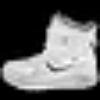

In [9]:
cv2_imshow(cv2.resize(X_train[0],(100,100)))

In [10]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
#same as doing one-hot-encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
import numpy as np

In [0]:
#conv2d expects a 4D tensor as input
X_train = np.expand_dims(X_train,axis = 3)
X_test = np.expand_dims(X_test,axis = 3)

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
#model initialization
model = Sequential()
#first convolution layer
model.add(Conv2D(32,(3,3),activation='relu',padding = 'same',input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
#second convolution layer
model.add(Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2)))
#flattening
model.add(Flatten())
#First dense layer
model.add(Dense(32,activation = 'relu'))
model.add(BatchNormalization()) #to reduce variance
model.add(Dropout(0.5)) #regularization
#Second dense layer
model.add(Dense(64,activation = 'relu'))
model.add(BatchNormalization()) #to reduce variance
model.add(Dropout(0.5)) #regularization
#output layer
model.add(Dense(10,activation = 'softmax'))

In [0]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=20,batch_size=300,validation_data=(X_test,y_test))

Epoch 1/20
200/200 [==============================] - 2s 9ms/step - loss: 1.0266 - accuracy: 0.6507 - val_loss: 1.1830 - val_accuracy: 0.8166
Epoch 2/20
200/200 [==============================] - 2s 8ms/step - loss: 0.5565 - accuracy: 0.8132 - val_loss: 0.4061 - val_accuracy: 0.8813
Epoch 3/20
200/200 [==============================] - 2s 8ms/step - loss: 0.4544 - accuracy: 0.8486 - val_loss: 0.3252 - val_accuracy: 0.8872
Epoch 4/20
200/200 [==============================] - 2s 8ms/step - loss: 0.3977 - accuracy: 0.8680 - val_loss: 0.3456 - val_accuracy: 0.8825
Epoch 5/20
200/200 [==============================] - 2s 8ms/step - loss: 0.3635 - accuracy: 0.8776 - val_loss: 0.3049 - val_accuracy: 0.8989
Epoch 6/20
200/200 [==============================] - 2s 8ms/step - loss: 0.3365 - accuracy: 0.8880 - val_loss: 0.2843 - val_accuracy: 0.9017
Epoch 7/20
200/200 [==============================] - 2s 8ms/step - loss: 0.3202 - accuracy: 0.8939 - val_loss: 0.2986 - val_accuracy: 0.8966
Epoch 

In [19]:
_, test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.9162


In [20]:
test_accuracy

0.9161999821662903

In [0]:
obj = history.history

In [0]:
accuracy = obj['accuracy']
val_accuracy = obj['val_accuracy']

loss = obj['loss']
val_loss = obj['val_loss']

x_axis_vals = np.arange(len(accuracy))

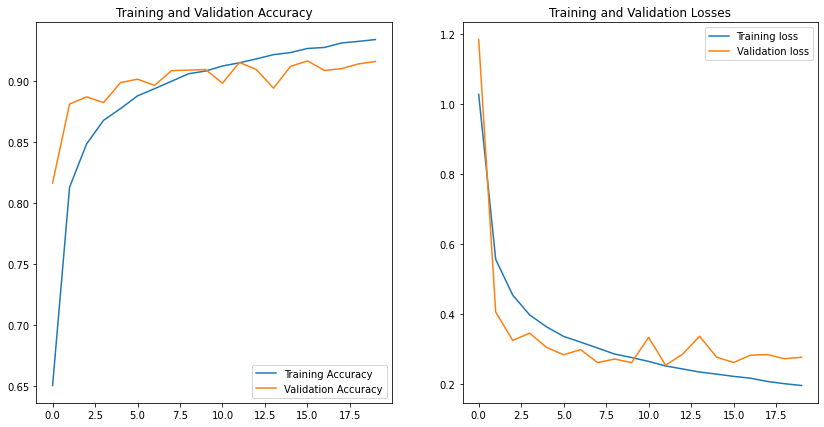

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
plt.plot(x_axis_vals, accuracy, label='Training Accuracy')
plt.plot(x_axis_vals, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(x_axis_vals, loss, label='Training loss')
plt.plot(x_axis_vals, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Losses')

plt.show()